In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

df = pd.read_csv('titanic.csv')
#Create a sample of 100 rows from the dataset and we'll use this to see how many survived and those that did not
df.head()


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
df=sns.load_dataset('titanic')

## Sampling


In [94]:
df_100= df.sample(100, random_state=42)
print("random 100:\n",df_100.head())

random 100:
      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
709         1       3    male   NaN      1      1  15.2458        C   Third   
439         0       2    male  31.0      0      0  10.5000        S  Second   
840         0       3    male  20.0      0      0   7.9250        S   Third   
720         1       2  female   6.0      0      1  33.0000        S  Second   
39          1       3  female  14.0      1      0  11.2417        C   Third   

       who  adult_male deck  embark_town alive  alone  
709    man        True  NaN    Cherbourg   yes  False  
439    man        True  NaN  Southampton    no   True  
840    man        True  NaN  Southampton    no   True  
720  child       False  NaN  Southampton   yes  False  
39   child       False  NaN    Cherbourg   yes  False  


1. Undersampling -they may not reflect the whole population. small population, lots of variability

2. Oversampling - more likely to be representative. Bigger sample, morerepresentation

""Determining the sample to use -check your data keenly, ensure that you know the data  eg how many males vs females, 70 males, 30 females. In sampling , men would be picked more

-Do all samples, trial and error (simple random sampling, systematic stratified and clustering), see the ones that makes sense and the ones that looks better to use

-Alternative, you can use mean, median and mode to guide your sample, interact with your data, understand then choose what you would use

## Probability Mass Function(PMF)


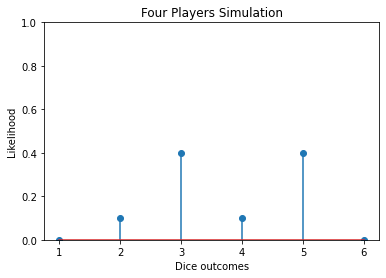

In [95]:
## Binomial
## 10 people playing Ludo. Simulating a dice role for 10 people.

np.random.seed(42) ## random seed reproducibility
rolls = np.random.randint(1,7,size=10) ### randint to generate numbers, always excludes the last number

faces = np.arange(1,7) # faces, frequency of the appearance for the dice 1/6.2/6 etc. Eachbroll of dice  is one face eg 1/6
counts = [np.sum(rolls==face) for face in faces ] #likelihood. Counts, counting how many times each face can appear with the people playing the game
pmf_empirical = counts/sum(counts) # calling in the binomial function using the pmf_emprical. If you are 10, there is a likelihood of getting a 6

plt.stem(faces,pmf_empirical) # plotting

plt.xlabel("Dice outcomes")
plt.ylabel("Likelihood")
plt.title("Four Players Simulation")
plt.ylim(0,1) #ensures that your prob is within 0 and 1. fixes the chart to fix the distribution
plt.show()



In [96]:
#List the columns
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [97]:
#likelihood of survival in a survival ship
likely_survived = df['survived'].value_counts(normalize =True)
print(likely_survived)

#in maths 0 is false, 1 is true
#normalise create propotions

0    0.616162
1    0.383838
Name: survived, dtype: float64


In [98]:
counts=df['survived'].value_counts()
print(counts)

0    549
1    342
Name: survived, dtype: int64


In [99]:
#survival group
survival_group = len(df['survived'])

proportion_0 =549/survival_group
proportion_1 = 342/survival_group
print(proportion_0, proportion_1)

0.6161616161616161 0.3838383838383838


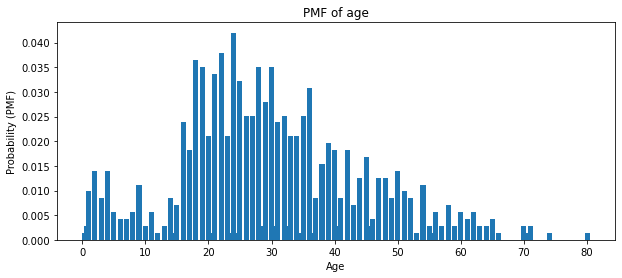

In [100]:
#create a chart for the above
likely_age =df['age'].value_counts(normalize =True).sort_index()
plt.figure(figsize=(10,4)) # plotting
plt.bar(likely_age.index,likely_age.values)
plt.title("PMF of age")
plt.xlabel("Age")
plt.ylabel("Probability (PMF)")
#plt.ylim(0,1) #set axis between 0 and 1
plt.show()

# Probability density function(PDF)

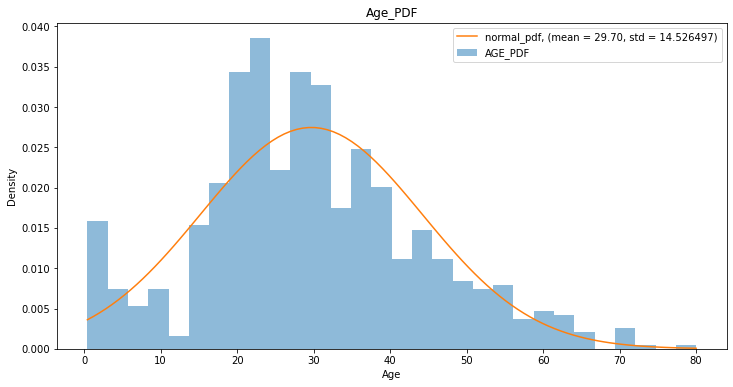

In [101]:
#eg the area under the curve represent the total
#pdf is used for contious data00prob cant be negative
#plot a histogram --age a contious
#convert age into normal distribution -mean, standard deviation
normal_ages = df['age']  #normal distribution
mu = normal_ages.mean()
sigma = normal_ages.std()
#creating our Curve
x = np.linspace(normal_ages.min(), normal_ages.max(),100) # defined as our curve creating our curve. convert age column to normal distribution (alwas something symetric and contious,, anything measurable)
ages_pdfs = norm.pdf(x, mu, sigma) #calculate our normal  for ages column

#mu = df['age'].mean
#sigma = df['age'].std
#plotting
plt.figure(figsize=(12,6))
plt.hist(normal_ages, bins=30, density= True, alpha = 0.5, label= 'AGE_PDF')
plt.plot(x,ages_pdfs, label= f"normal_pdf, (mean = {mu:.2f}, std = {sigma:2f})")
plt.title("Age_PDF")
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


## REPEATED classes


## PMF
1. #what is the prob of getting 5 heasds (honorable Kibaki's face) in 12 flips

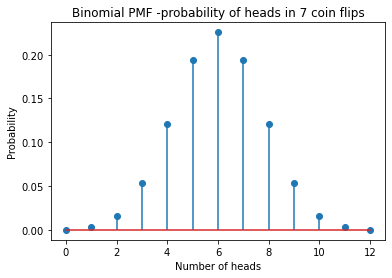

In [102]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# coin flip scenario
n=12 #number of flips that we have
p=0.5

x=np.arange(0, n+1)
pmf_vals =binom.pmf(x, n, p)

plt.stem(x, pmf_vals)
plt.title("Binomial PMF -probability of heads in 7 coin flips")
plt.xlabel('Number of heads')
plt.ylabel('Probability')
plt.show()

# probability of getting half of the flips with head is very high, followed, 5 and 7
# low chances of flipping heads is low with both few and more flips

In [103]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# coin flip scenario
n=12 #number of flips that we have
p=0.5

x=np.arange(0, n+1)
pmf_heads=binom.pmf(x, n, p) #toss a coin 5 times and get 3 heads
pmf_tails =binom.pmf(n-x, n, p) # 2 tails

width

plt.title("Binomial PMF of a 12 coin toss")
plt.xlabel('Number of heads/tails')
plt.ylabel('Number of Probability')
plt.xticks(x)
plt.legend()
plt.show()

NameError: name 'width' is not defined

In [ ]:
#what is prob that exactly 4 customer arrive in a min if the average is 5 per minute

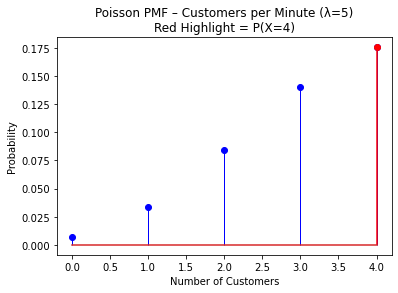

In [ ]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Parameters
lam = 5 # 5 customers per minute vs 4 all in a minute (array)
x = np.arange(0, 5) # list of possible scenarios .(0,1,2,3,4....)........................
pmf_vals = poisson.pmf(x, lam) # intiating the pmf

# Plot all bars in blue
markerline, stemlines, baseline = plt.stem(x, pmf_vals)
plt.setp(stemlines, color='blue', linewidth=1)
plt.setp(markerline, color='blue', markersize=6)

# Highlight k=4 in red
k = 4
plt.stem([k], [pmf_vals[k]], linefmt='r', markerfmt='ro', basefmt=" ")

plt.title("Poisson PMF – Customers per Minute (λ=5)\nRed Highlight = P(X=4)")
plt.xlabel("Number of Customers")
plt.ylabel("Probability")
plt.show()

In [ ]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

#parameters
lam =5 #number of events in a min.5 customers per min vs 4 all in a min.lambad is a convenient way to stop at here
x= np.arange(0,5) #list of possible scenarios..in this case x is not fixed..how may scenarios?
pmf_vals=poisson.pmf(x,lam) #initiating the pmf

#plot all the bars in blue
markerline, streamlines, baseline=plt.stem(x, pmf_vals)
plt.setp(streamlines, color='blue', linewidth=1)
plt.setp(markerline, color='blue', marksize=6)

#highlight k=4 in red
k=4
plt.ste,([k], [pmf_vals[k]], linefmt='r', markerfmt='ro', basefmt=" ")



plt.title("Poisson PMF-customers per min(lam=5)\nRed highlight=p(x=4)")
plt.xlabel('Number of customers')
plt.ylabel('Probability')
plt.show()

SyntaxError: invalid syntax (<ipython-input-4-46e6f5bc9cf7>, line 17)

## PDF--Contnous variables

What is the likelibood that a randomly selected student has a height between 160 and 170 cm


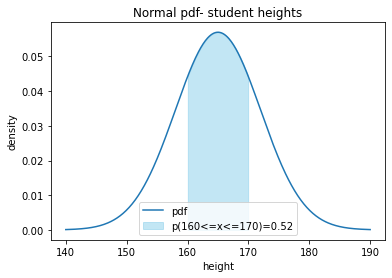

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#parameters :assume mean height as 165cm, std deviation 7cm
mu=165
sigma=7

#contionus range of heights
x=np.linspace(140,190,400) #create a smooth height for the valueswe plot
pdf_vals=norm.pdf(x,mu,sigma)

#probability for 160-170cm
lower,upper=160,170
prob_range = norm.cdf(upper, mu,sigma)- norm.cdf(lower,mu,sigma)

#plot pdf
plt.plot(x,pdf_vals,label='pdf')
plt.fill_between(x,pdf_vals, where=(x>=lower) & (x<=upper), color='skyblue', alpha=0.5,
                 label=f"p({lower}<=x<={upper})={prob_range:.2f}")
plt.title("Normal pdf- student heights")
plt.xlabel("height")
plt.ylabel("density")
plt.legend()
plt.show()


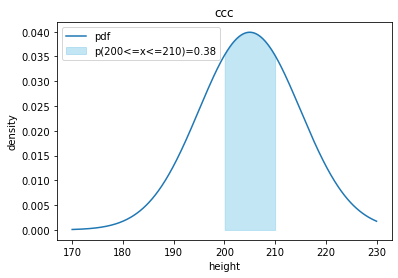

In [ ]:
import numpy as np
from scipy.stats import norm #look into cdf
import matplotlib.pyplot as plt

#parameters :assume mean height as 165cm, std deviation 7cm
mu=205
sigma=10

#contionus range of heights
x=np.linspace(170,230,400) #create a smooth height for the valueswe plot
pdf_vals=norm.pdf(x,mu,sigma)

#probability for 160-170cm
lower,upper=200,210
prob_range = norm.cdf(upper, mu,sigma)- norm.cdf(lower,mu,sigma)

#plot pdf
plt.plot(x,pdf_vals,label='pdf')
plt.fill_between(x,pdf_vals, where=(x>=lower) & (x<=upper), color='skyblue', alpha=0.5,
                 label=f"p({lower}<=x<={upper})={prob_range:.2f}")
plt.title("ccc")
plt.xlabel("height")
plt.ylabel("density")
plt.legend()
plt.show()

What is prob that a customer waits btn 2 and 5 mins in line?

ValueError: x and y must have same first dimension, but have shapes (400,) and (1,)

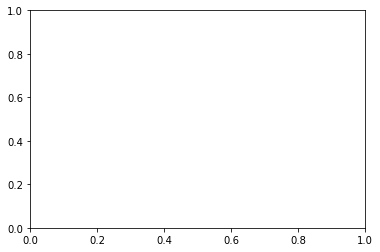

In [ ]:
from scipy.stats import expon

#average waiting time =3.3 min
scale =3.5 # mean =scale
x =np.linspace(0,10,400) #equally spaced intervals ##listig possible scenarios btn your start which would be o and stop 5
pdf_vals =expon(x, scale=scale)


# Probability for 2-5 minutes
lower, upper = 2, 5
prob_range = expon.cdf(upper, scale=scale) - expon.cdf(lower, scale=scale)

# Plot PDF
plt.plot(x, pdf_vals, label="PDF")
plt.fill_between(x, pdf_vals, where=(x>=lower) & (x<=upper), color='lightgreen', alpha=0.5,
                 label=f"P({lower}≤X≤{upper}) = {prob_range:.2f}")
plt.title("Exponential PDF – Bank Waiting Times")
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Density")
plt.legend()
plt.show()


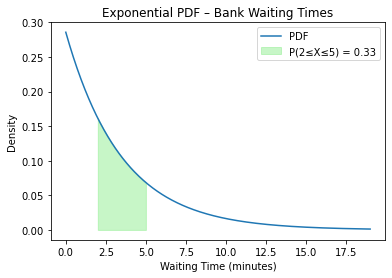

In [ ]:
# Average waiting time = 3.5 minutes
scale = 3.5 # mean = scale
x = np.linspace(0, 19, 400) ## listing down the possible scenarios between your start which wouldbe 0 and stop 5
pdf_vals = expon.pdf(x, scale=scale)

# Probability for 2-5 minutes
lower, upper = 2, 5
prob_range = expon.cdf(upper, scale=scale) - expon.cdf(lower, scale=scale)

# Plot PDF
plt.plot(x, pdf_vals, label="PDF")
plt.fill_between(x, pdf_vals, where=(x>=lower) & (x<=upper), color='lightgreen', alpha=0.5,
                 label=f"P({lower}≤X≤{upper}) = {prob_range:.2f}")
plt.title("Exponential PDF – Bank Waiting Times")
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Density")
plt.legend()
plt.show()

# CDF — Cumulative Distribution Function

CDF works for both discrete & continuous variables.

It answers: [ P(X \le x) ]

It accumulates probability from left to right.

Example:
CDF at x = 100,000 for house prices gives:

Probability a house costs 100k or less

In [ ]:
#What is the prob that a customer's bill is below a certain point
import seaborn as sns
import matplotlib as plt
import numpy as np

tips =sns.load_dataset('tips')

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Estimated probability that total bill <=$25:0.77


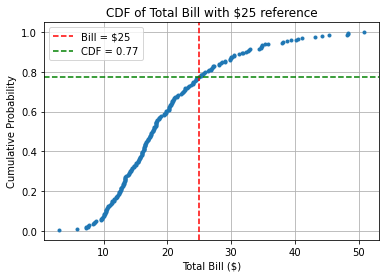

In [ ]:
# #What is the prob that a customer's bill is below a certain point
#sort the values
sorted_bills=np.sort(tips['total_bill'])

#cumulative probability
cdf=np.arange(1, len(sorted_bills)+1) / len(sorted_bills)  #initaiating a probability distribution.+helps us define our stop

#find the index where bill <=25
index =np.searchsorted(sorted_bills,25,side='right')

#prob a bill is <=$25
prob_less_25 =cdf[index-1]
print(f'Estimated probability that total bill <=$25:{prob_less_25:.2f}')

#plt.plot(sorted_bills, cdf, marker ='.', linestyle='none')
#plt.axvline(x=25, color ='red', linestyle ='--', label ='Bill')

plt.plot(sorted_bills, cdf, marker='.', linestyle='none')
plt.axvline(x=25, color='red', linestyle='--', label='Bill = $25')
plt.axhline(y=prob_less_25, color='green', linestyle='--', label=f'CDF = {prob_less_25:.2f}')
plt.title("CDF of Total Bill with $25 reference")
plt.xlabel("Total Bill ($)")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()


2. Normal distribution and z-scores
Many natural variables follow the normal distribution. even if data is not normal, averages often become normal(clt)
Chracteristics:
-Bell shaped
-symmetric
-mean=median=mode
-Defined by mean (mu) and standard deviation (sigma)

3. z-scores
Standardization values :[z= rac{x-\mu}{\sigma]}..mu should be 0 and std 1

Example
The mean of height in calss is 172 cm. the std is 10cm. what is the likelihood of getting 180 cm

standar normal distribytion =(180 -165)/10 ===equal to 1

In [ ]:
data =tips['total_bill']
mu =data.mean()
sigma = data.std()
z= (data-mu)/sigma  #standard normal distribution

z.head()

0   -0.314066
1   -1.061054
2    0.137497
3    0.437416
4    0.539635
Name: total_bill, dtype: float64

In [ ]:
mu

29.69911764705882

In [ ]:
sigma

14.526497332334042

# CENTRAL LIMIT THEOREM(CLT)

The CLT states:
   if you repeatedly take samples and compare their means, the distribution of those sample means becomes normal, even if the original data is skewed.

Why does this matter?
-Makes confidence intervals possible
-Allows statistical tests
-Underpine much of machine learning
P(X (variable itself <=x(range/limit)

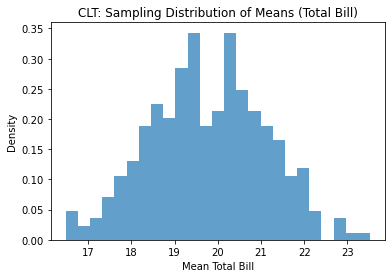

In [ ]:
import matplotlib.pyplot as plt
#clt example using total_bill in tips dataset
np.random.seed(42)

sample_means = []
for _ in range(300):
    sample = tips['total_bill'].sample(40, replace=True)
    sample_means.append(sample.mean())

plt.hist(sample_means, bins=25, density=True, alpha=0.7)
plt.title("CLT: Sampling Distribution of Means (Total Bill)")
plt.xlabel("Mean Total Bill")
plt.ylabel("Density")
plt.show()

Confidence Intervals (Normal vs T-distribution)

A CI answers:

“What range likely contains the TRUE population mean?”

When to use what?
Case	Use
σ known or n > 30	Normal distribution
σ unknown & n < 30	T-distribution

In [ ]:
# Example: 95% CI for mean total bill (t-distribution)
from scipy.stats import t

sample = tips['total_bill'].sample(30, random_state=1)
xbar = sample.mean()
s = sample.std(ddof=1)
n = len(sample)

t_value = t.ppf(0.975, df=n-1)
se = s / np.sqrt(n)

(xbar - t_value*se, xbar + t_value*se)

(16.270636289064296, 23.208030377602366)

# Hypothesis testing

1. What is a Hypothesis?
Definition:
A hypothesis is a statement or assumption about a population parameter (like the average tip, or average bill) that we want to test using data.

Think of it like a claim someone makes about a population:

"The average tip in this restaurant is $2.50"
"Men tip more than women"
"Smokers spend more than non-smokers"
We can test these claims using sample data, even if we don’t have access to the entire population.

Why do we test hypotheses?

To make data-driven decisions rather than guessing.
To verify assumptions in real-life scenarios like business, medicine, or social science.
Example Use Cases:

Business: Does a new promotion increase average sales?
Healthcare: Does a new drug lower blood pressure more than the old drug?
Education: Do students who attend a prep course score higher on tests?
In Python, we can test hypotheses using t-tests, z-tests, and p-



2. Null and Alternative Hypotheses
Definition:
When we test a hypothesis, we always set up two competing statements:

Null Hypothesis (H₀):

The "default" or "status quo" claim.
Assumes no effect or no difference.
Example: "The average tip is $2.50"
Alternative Hypothesis (H₁ or Ha):

The claim we want to test or prove.
Suggests there is an effect or difference exists.
Example: "The average tip is NOT $2.50"
Important: We never "prove" the alternative, we only see if we have enough evidence to reject the null.

Real-Life Analogy:
Imagine a courtroom:

Null Hypothesis (H₀) → "The defendant is innocent"
Alternative Hypothesis (H₁) → "The defendant is guilty"
We try to see if evidence is strong enough to reject "innocent".


3. P-values and Statistical Significance

**Definition:**  
- A **p-value** measures the **strength of evidence** against the null hypothesis.  
- It answers the question:  
*"If the null hypothesis were true, what is the probability of observing the data (or more extreme) that we got?"*  

**Decision Rule:**  
- **p-value < 0.05** → Strong evidence against H₀ → Reject H₀  
- **p-value ≥ 0.05** → Weak evidence against H₀ → Fail to reject H₀  

**Example:**  
- We claim the average tip is $2.50 (H₀)  
- After testing, p-value = 0.001 → Very unlikely to observe this sample if H₀ is true → Reject H₀  

**Real-Life Use Case:**  
- Testing if a new marketing campaign **really increased sales**.  
- If p-value is small, the campaign likely had an effect; if large, the effect may be due to chance.



Hypothesis testing

pvalue -measures the strength of evidence against the null hypotheis..answers the question:  if the null hypotheiss were true, what is the probability of observing the data (or more extreme) that we got?

Decision rule:
 p value <0.05 -strong evidence against H0 - reject H0
 p value >0.05 -weak evidence against H0 - fail to reject H0

Example average tip is $2(H0)

In [ ]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib as plt

##Null hypothesis is Ho == The average tips is $2.5
Our test is getting sufficient evidence against the null hypothesis


In [ ]:
# one sample t test: is the avearge tip $2.5?
sample_mean =tips['tip'].mean()  ##actual mean
hypothesized_mean =2.5  ## null hypothesis --assumption

#when doing a 1 sample t test-sample mean vs a known value
t_stat, p_value =stats.ttest_1samp(tips['tip'], hypothesized_mean) #t stat-one sample test
print(f'T-statistic:{t_stat:.2f}, p-value: {p-p_value:.4f}')

if p_value < 0.05:
    print("Reject Null Hypothesis: Average tip is significantly different from $2.5")
else:
    print("Fail to Reject Null Hypothesis: No significant difference from $2.5")

T-statistic:5.63, p-value: 0.5000
Reject Null Hypothesis: Average tip is significantly different from $2.5


# Type I and Type II errors

Even after testing, we can make mistakes:

1. Type 1 error (false positive)- reject H0 when it is actually true. Example: saying the 'average tip is not $2.5' when it really is.
2. Type 11 error (false negative)- fail to reject Ho when H1 is true. Example : saying 'the average is $2.5' when it is not

Real -life analogy
1. Type 1 -convicting an innocent person
2. Type II- Letting a guilty person go free

Z test vs T -test
1. z test: used when the population variance is known and sample is large (>30)
2. T test - used when the population variance is unknown or sample size is small (<30>)

In practice, we usually use T-test because population variance is rarely known

Z- test
1. Used when the sample is large (n>30)
2. We are aware of the standard deviation (eg large companies will always know the  difference in quantity of packaged products eg sugar processors)

T test
1. Used when the sampe is samlple  (n>30)
2. If we dont know the standard deviation


Type of t test
1. One sample -comparing sample mean vs a known value (assumption/null hypothesis)
2. Two sample- comparing two sample means
3. Paored t test- behavious of the same group before and after the test ( eg old drug-new drug behavior)


#simulating type 1 and type ii error

np.random.seed(42)

In [ ]:
#one sample t test
# average bill is $20
t_stat, pvalue =stats.ttest_1samp(tips['total_bill'], 20)
print(f'T-statistics:{t_stat:.2f}, p-value: {p_value:.4f}')

T-statistics:-0.38, p-value: 0.0000


In [ ]:
# two sample t test
# Example: tips for smokers vs non smokers) comapring means of two samples)
smoker_tips =tips[tips['smoker']== 'Yes']['tip'] # people who smoke and how much they tipped

non_smoker_tips =tips[tips['smoker']== 'No']['tip'] # people who dont smoke and how much they tipped

t_stat, pvalue =stats.ttest_ind(smoker_tips, non_smoker_tips)
print(f'T-statistics:{t_stat:.2f}, p-value: {p_value:.4f}')

if p_value <0.05:
    print('Reject null hypothesis: Tips differ between smokers and non smokers')
else:
    print('fail to reject null hypothesis: no significant difference')

T-statistics:0.09, p-value: 0.0000
Reject null hypothesis: Tips differ between smokers and non smokers


In [ ]:
smoker_tips.mean()

3.008709677419355

In [ ]:
non_smoker_tips.mean()

2.9918543046357615

In [ ]:
smoker_tips.mean() - non_smoker_tips.mean()

0.016855372783593392

## Z score test statistic

A z scoee tells use how many standard deviations apart from two group means are

We use a z test when  w ewant to comapre wto groups, the sampe, size is fairly largge,, we  want to see if the difference in average is 'big enough' to matter staisticaly

imgaine
Group A: customers see an old website design
Group B: cusromers see a new design

We want to know:
is the new lauyout really performing differntly, or is te difference hust random chance?  If a bug difference support H0

The z scorw formula is:
average mean (nps) of group a - average mean (nps) of group b)/ square root (std nps of group a/na + std nps of group b/nb)


In [ ]:
male   = tips[tips['sex']=='Male']['tip']
female = tips[tips['sex']=='Female']['tip']


x1, x2 =male.mean(), female.mean()
s1, s2 =male.std(), female.std()
n1,n2 = len(male), len(female)

z= (x1 -x2) / np.sqrt((s1**2)/n1 + (s2**2)/n2)
z

1.489536377092501

In [ ]:
z= (x1 - x2)

In [ ]:
y = np.sqrt((s1**2)/n1 + (s2**2)/n2)

In [ ]:
z_score =z/y
z_score

1.489536377092501

Decision rule:
a 95% confidence, if:
|z|>1.96 -reject Ho
|z|<=1.96 - fail to reject Ho

this tells us whether the difference obsered is real or just randpm noise

In [ ]:
# example above: since 1.48<1.96, we fail to reject H0 and agree that male gender tips more than the female gender

## Intro to experimental design

Experiments helps us understand cause and effect
Control vs treatments
.control Group- gets the normal experience (eg old webiste, old price etc)
.treatment group -gets the new experience (eg new website, ner price etc)

Real -life example
A  supermarket wants to test new packaging for a product
.customers who see old packaging - control group
.customers who see new packaging- treatment group

Randomization
We randomly assign people to groups to avoid patterns like:
.all students in treatment are morning learners
.all smokers end up in the same group
.all younger customers end up in control
Randomization reduces bias and ensure fairness

Avoiding Bias
Common biases:
 . Selection bias: certain types of people are picked more often
 . Measurement bias: faulty tools eg broken scale
 . Survivirship bias: only successful cases are studied




 4. Effect size and statistcical power

How big is the difference and is it statiscally signifaicant
 sometimes differences are statistacllay signifacnt bit not meanigful

 Example:
 .Website A (old website) gets 10.0% conversion
 .Website B (new colorful website) gets 10.2% conversion
 Difference=0.2%
 Even if signifacnt, it may not matter to the business

 use cohens  d  to measure the effect size
 effect size = mean of group A - minus of group b / pooled standard  deviation

 ie pooled s
 1. Main square root
 2. size of control group -1 )* squared standard devaition of the control group
 3. size of treatment group -1 )* squared standard devaition of the treatment group
 4. add step 2 and step 3 together
 5, size of groups 

 Interpreation
  if 0.2=small effect
    0.5 - medium effect
    0.8+ -large effect








In [ ]:
# mean of male tippers
print(x1) # guys

3.0896178343949043


In [ ]:
print (x2) #ladies

2.8334482758620685


In [ ]:
# size of n
print(n1) # how many men

157


In [ ]:
# size of n
print(n2) # how many women

87


In [ ]:
# standard deviation
print(s1) # std men

1.489101813842018


In [ ]:
# standard deviation
print(s2) # std women

1.1594945045210152


In [ ]:
# compute cohen's d

s_pooled =np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2)/ (n1+n2-2))
d=(x1-x2)/ s_pooled
d

0.18549449588299197

In [ ]:
#interpretation of cohens d

#Since 0.18 is around 0.2, then the effect is way too small to lead to meangful change . if we have enough evidence not to do the chnage

Key concepts in A/B testing
1. Mterics (what are you measuring)

a metric is the number

Tells us whether the difference btn A and B is real or happened y chance

In [109]:
#Example
#Do smokers or non smokers give higher tips?

A= tips[tips['smoker']=='Yes']['tip']  #variant A
B= tips[tips['smoker']=='No']['tip']  #variant B

print('Average Tip(Smokers):', round(A.mean(), 2))
print('Average Tip(Non Smokers):', round(B.mean(), 2))

t_stat, p_val =stats.ttest_ind(A,B)
print('\nT-Statistic:', t_stat)
print('p-Value:', p_val)

Average Tip(Smokers): 3.01
Average Tip(Non Smokers): 2.99

T-Statistic: 0.09222805186888201
p-Value: 0.9265931522244976


In [ ]:
###incase you fail to reject null hypotheis like above go ahead and do A/B test

In [ ]:
# Do people  tip more on weekends cpmpared to weeekdays?

A= tips[tips['day'].isin(['Sat', 'Sun'])]['tip']  #variant A
A= tips[tips['day'].isin(['Thur', 'Fri'])]['tip']  #variant A

print('Average Tip(Smokers):', round(A.mean(), 2))
print('Average Tip(Non Smokers):', round(B.mean(), 2))

t_stat, p_val =stats.ttest_ind(A,B)
print('\nT-Statistic:', t_stat)
print('p-Value:', p_val)